In [275]:
import numpy as np
import pandas as pd

In [276]:
df = pd.read_csv('spam.csv',encoding="latin1")
df.sample(1)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2835,ham,Nice.nice.how is it working?,NaN,NaN,NaN


In [277]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [278]:
df.shape

(5572, 5)

In [279]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(1)

,v1,v2
4262,ham,Den only weekdays got special price... Haiz......


In [280]:
df.rename(columns={'v1':"target",'v2':'text'},inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [281]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [282]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [283]:
df.duplicated().sum()

403

In [284]:
df=df.drop_duplicates(keep='first')

In [285]:
df.duplicated().sum()

0

In [286]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

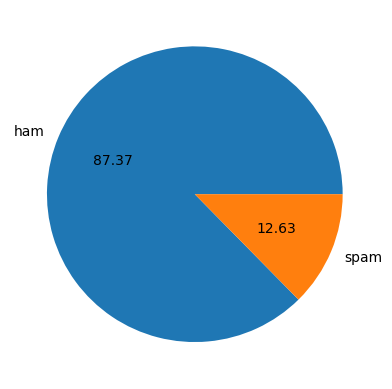

In [287]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [288]:
import nltk 

In [289]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kunwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [290]:
df['num_characters']=df['text'].apply(len)

In [291]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [292]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [293]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [294]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [295]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [296]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kunwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [297]:
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [298]:
def transform_Text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))
    return " ".join(y)

In [299]:
transform_Text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [300]:
df['tranformed_text']=df['text'].apply(transform_Text)

In [301]:
df.head()

,target,text,num_characters,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [302]:
from wordcloud import WordCloud
wc = WordCloud(width=700,height=750)


In [303]:
spam_wc=wc.generate(df[df['target']==1]['tranformed_text'].str.cat(sep=" "))


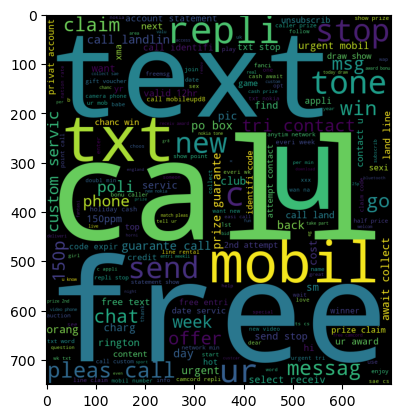

In [304]:
plt.imshow(spam_wc)


In [305]:
normal_wc=wc.generate(df[df['target']==0]['tranformed_text'].str.cat(sep=" "))


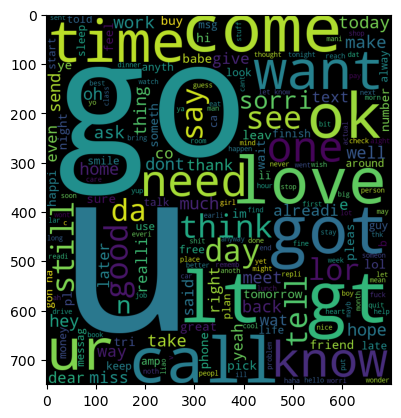

In [306]:
plt.imshow(normal_wc)

In [307]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000,ngram_range=(1,2),min_df=2,max_df=.95)

In [308]:
x = tf.fit_transform(df['tranformed_text']).toarray()

In [309]:
y = df['target'].values

In [310]:
from sklearn.model_selection import train_test_split


In [311]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=42)

In [312]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=  rf.predict(xtest)
print(confusion_matrix(ytest,ypred))

[[888   1]
 [ 27 118]]


In [313]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier( n_estimators=300,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42)
et.fit(xtrain,ytrain)
ypred=et.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[889   0]
 [ 51  94]]
0.9506769825918762


In [314]:
from xgboost import XGBClassifier
xg =  XGBClassifier()
xg.fit(xtrain,ytrain)
ypred=xg.predict(xtest)
print(confusion_matrix(ytest,ypred))

[[876  13]
 [ 22 123]]


In [315]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [316]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

mnb = MultinomialNB(fit_prior=False)
mnb.fit(xtrain, ytrain)

prob = mnb.predict_proba(xtest)[:, 1]
yp = (prob >= 0.084).astype(int)

print("Confusion Matrix:\n", confusion_matrix(ytest, yp))
print("Classification Report:\n", classification_report(ytest, yp))
print("Accuracy:", accuracy_score(ytest, yp))


Confusion Matrix:
 [[309 580]
 [  0 145]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.35      0.52       889
           1       0.20      1.00      0.33       145

    accuracy                           0.44      1034
   macro avg       0.60      0.67      0.42      1034
weighted avg       0.89      0.44      0.49      1034

Accuracy: 0.43907156673114117


In [319]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
pickle.dump(rf,open('rf.pkl','wb'))
pickle.dump(et,open('et.pkl','wb'))